___
#### 문법 정리
```python
1) 모든 컬럼의 값 더하기
- df.sum(axis='columns')

2) 일부 컬럼의 값 더하기
- df.loc[:, '컬럼1':'컬럼2'].sum(axis='columns')
    > .loc[]로 인덱싱해서 .sum() 메소드 적용.
```
___

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv('../data/broadcast.csv', index_col=0)
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


<Axes: >

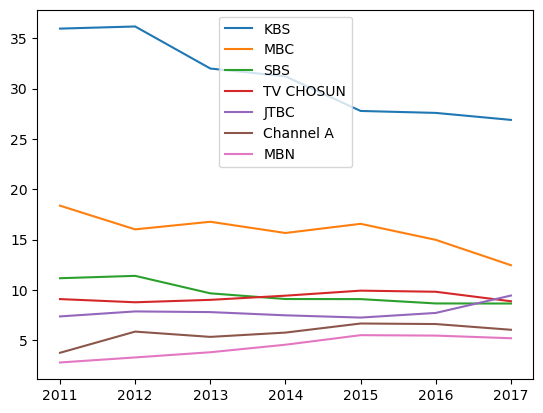

In [3]:
# 긱 방송사의 시청률 추이   
df.plot()

#### 새로운 컬럼 추가하기

In [4]:
# 연도별 방송사 총 시청률 구하기
df['KBS'] + df['MBC'] + df['SBS'] + df['TV CHOSUN'] + df['JTBC'] + df['Channel A'] + df['MBN']

2011    88.560
2012    89.440
2013    84.451
2014    83.259
2015    82.854
2016    80.891
2017    77.626
dtype: float64

In [5]:
# 위와 같은 코드 - 모든 컬럼의 값 더하기
df.sum(axis='columns')

2011    88.560
2012    89.440
2013    84.451
2014    83.259
2015    82.854
2016    80.891
2017    77.626
dtype: float64

In [7]:
df['Total'] = df.sum(axis='columns')
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN,Total
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809,177.120
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310,178.880
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825,168.902
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572,166.518
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520,165.708
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477,161.782
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215,155.252


<Axes: >

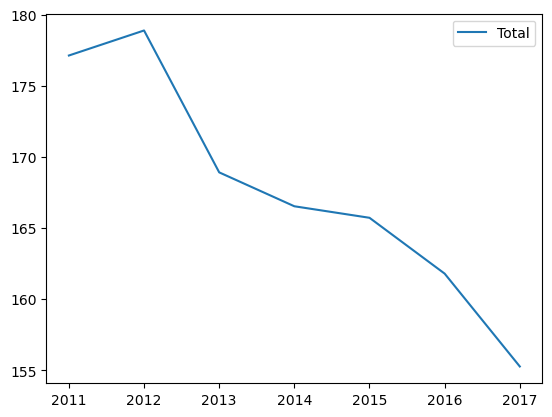

In [8]:
df.plot(y='Total')

#### 지상파와 종편의 시청률 비교

In [11]:
df['Group 1'] = df.loc[:, 'KBS':'SBS'].sum(axis='columns')  # 지상파
df['Group 2'] = df.loc[:, 'TV CHOSUN':'MBN'].sum(axis='columns')  # 종편

df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN,Total,Group 1,Group 2
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809,177.120,65.498,23.062
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310,178.880,63.593,25.847
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825,168.902,58.440,26.011
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572,166.518,55.981,27.278
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520,165.708,53.449,29.405
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477,161.782,51.234,29.657
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215,155.252,48.016,29.610


<Axes: >

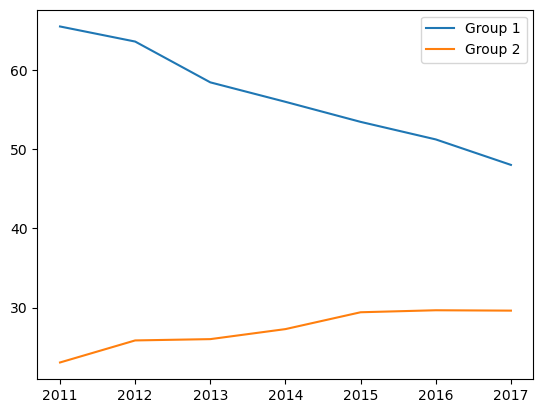

In [13]:
df.plot(y=['Group 1', 'Group 2'])